# Plot attentions

### Load model

In [2]:
import sys, os
ROOT = "/home/hadoop/deepy"
sys.path.append(ROOT)

In [3]:
import experiments.attention_models.baseline_model
reload(experiments.attention_models.baseline_model)
from experiments.attention_models.baseline_model import get_network

model_path = os.path.join(ROOT, "experiments/attention_models/models/mnist_att_params2.gz")
network = get_network(model_path, disable_reinforce=True)

Couldn't import dot_parser, loading of dot files will not be possible.


In [7]:
import numpy as np
import theano

glimpse_function = theano.function([network.inputs[0]], network.layers[0].positions)

### Plot attentions

In [37]:
from deepy.dataset import MnistDataset, MiniBatches
mnist = MiniBatches(MnistDataset(), batch_size=1)

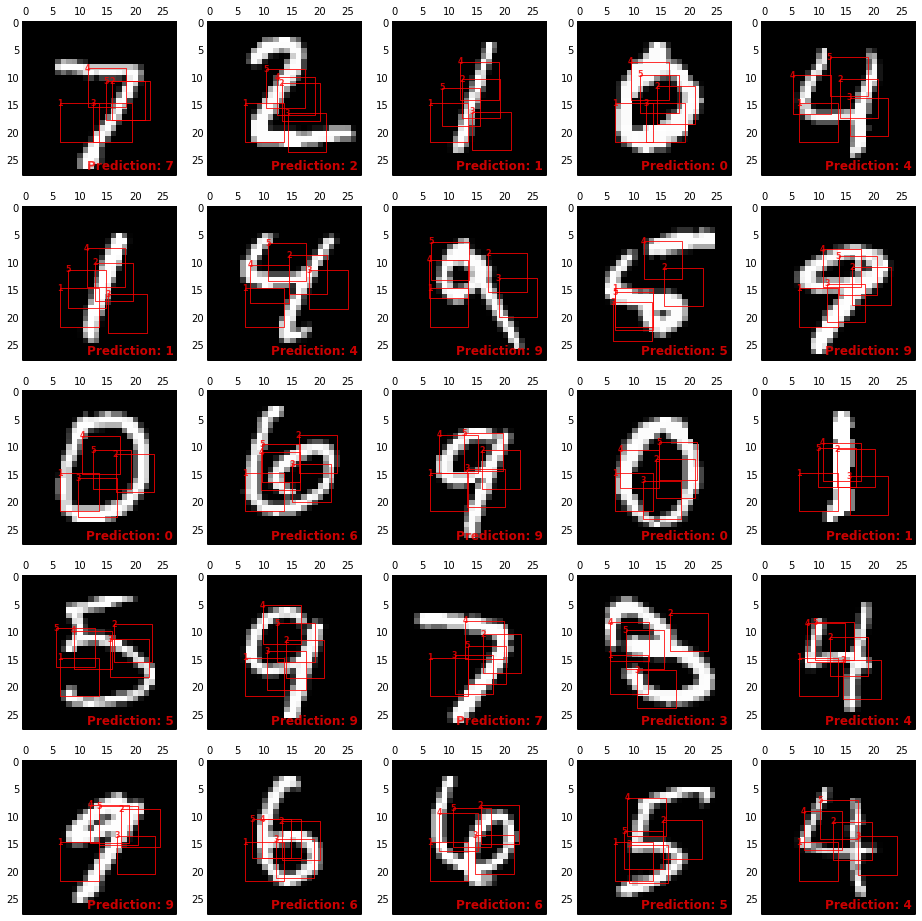

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.figure(figsize=(16, 16))

for image_n in range(25):
    image = mnist.test_set()[image_n][0].reshape((28,28))
    prediction = np.argmax(network.predict(image.reshape((1,28*28))))
    glimpses = glimpse_function(image.reshape((1,28*28)))

    gca = plt.subplot(5, 5, image_n+1)
    gca.matshow(image, cmap="gray")
    for i, glimpse in enumerate(glimpses):
        x, y = glimpse * 14 + 14
        gca.add_patch(Rectangle((x - 3.5, y - 3.5), 7, 7, ec="red", fill=None, alpha=0.8))
        gca.annotate(str(i+1), xy=(x - 3.5, y - 3.5), color='r', weight='bold', fontsize=8, ha='center', va='center', alpha=0.8)
    gca.annotate("Prediction: %d" % prediction, xy=(19, 26), color='r', weight='bold', fontsize=12, ha='center', va='center', alpha=0.8)
plt.show()